## DataLoader & Leaderboard

[Tianfan Fu@Gatech](futianfan.github.io)

Agenda

- How to load dataset in TDC?
    - Example for `single_pred` ML problem
    - Example for `multi_pred` ML problem
    - Example for `generation` ML problem
- Run ML models using few lines of codes
    - with scikit-learn
    - with DeepPurpose
- How to use leaderboard in TDC?
    - ADMET leaderboard

Let's start!

### How to load dataset in TDC?

Supposed a dataset X is from therapeutic task Y with machine learning problem Z, then to obtain the data and splits, simply type:

```python
from tdc.Z import Y
data = Y(name = 'X')
split = data.split()
```

We categorize all therapeutic tasks into three general ML problems (Z):
- `single_pred`: Prediction of property for an individual biomedical entity, output is a scalar, e.g., molecule property prediction. 
- `multi_pred`: Prediction of property for multiple biomedical entities, output is a scalar, e.g., drug-target interaction. 
- `generation`: Generation of a new desirable biomedical entity, output is a biomedical entity, e.g., molecule generation, reaction prediction. 

<div>
<img src="tdc_problems.png" width="500" align="left"/>
</div>

#### `single_pred`: Prediction of property for an individual biomedical entity.

In [17]:
from tdc.single_pred import ADME ### ADME predicts absorption, distribution, metabolism, excretion of a drug. 
data = ADME(name = 'Caco2_Wang')

Found local copy...
Loading...
Done!


In [18]:
data.get_data().head(5)

,Drug_ID,Drug,Y
0,(-)-epicatechin,Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2,-6.220000
1,"(2E,4Z,8Z)-N-isobutyldodeca-2,4,10-triene-8 -y...",C/C=C\C#CCC/C=C\C=C\C(=O)NCC(C)C,-3.860000
2,codeine,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,-4.090000
3,creatinine,CN1CC(=O)NC1=N,-5.935409
4,danazol,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,-4.840000


Here, we can also flag `convert_format` to other molecule representation. For example, ECFP4:

In [19]:
data = ADME(name = 'Caco2_Wang', convert_format = 'ECFP4')
data.get_data().head(5)

Found local copy...
Loading...
Done!


,Drug_ID,Drug,Drug_ECFP4,Y
0,(-)-epicatechin,Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-6.220000
1,"(2E,4Z,8Z)-N-isobutyldodeca-2,4,10-triene-8 -y...",C/C=C\C#CCC/C=C\C=C\C(=O)NCC(C)C,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-3.860000
2,codeine,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-4.090000
3,creatinine,CN1CC(=O)NC1=N,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-5.935409
4,danazol,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",-4.840000


You can also get other format from 
- string, e.g., SMILES, SELFIES
- graph, e.g., DGL, PyG (torch-geometric), Graph2D
- feature vector, e.g., ECFP2/ECFP4/ECFP6/MACCS/Daylight/RDKit2D/Morgan/PubChem

In [22]:
data = ADME(name = 'Caco2_Wang', convert_format = 'DGL')
data.get_data()['Drug_DGL'][0]

Found local copy...
Loading...
Done!


Graph(num_nodes=21, num_edges=46,
      ndata_schemes={}
      edata_schemes={})

#### `multi_pred`: Prediction of property for multiple biomedical entities.

In [23]:
from tdc.multi_pred import PPI ### protein-protein interaction
data = PPI(name = 'HuRI')
split = data.get_split()
split['valid'].head(2)

Found local copy...
Loading...
Done!


,Protein1_ID,Protein1,Protein2_ID,Protein2,Y
0,ENSG00000102119,MDNYADLSDTELTTLLRRYNIPHGPVVDLNSTRGDADMYDLPKKED...,ENSG00000176435,MRPAFALCLLWQALWPGPGGGEHPTADRAGCSASGACYSLHHATMK...,1
1,ENSG00000157110,MNNGGKAEKENTPSEANLQEEEVRTLFVSGLPLDIKPRELYLLFRP...,ENSG00000227151,MEEPRPSKRLRSMAPNQASGGPPPEPGCCVADPEGSVEADGPAQPA...,1


Lots of functionalities such as negative pair sampling, graph transformation, label units conversion and so on! Checkout https://tdcommons.ai/functions/data_process

#### `generation`: Generation of a new desirable biomedical entity. 

Output is an entity, instead of a scalar. 

- molecule generation: generating novel and diverse molecules given molecule library.  
- molecule optimization: generating molecules with desirable properties. 
- retrosynthesis/synthesis: for a chemical reaction, given product/a set of reactants, predict reactants set/product. 

In [24]:
from tdc.generation import MolGen
data = MolGen(name = 'MOSES')
split = data.get_split()
split['train'].head(2)

Found local copy...
Loading...
Done!


,smiles
0,CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1
1,CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1


For molecule optimization, we also have lots of oracles within one line of code! 
https://tdcommons.ai/functions/oracles/


In [25]:
from tdc import Oracle
oracle = Oracle(name = 'SA')  ### Synthetic Accessibility 
oracle(['CC(C)(C)[C@H]1CCc2c(sc(NC(=O)COc3ccc(Cl)cc3)c2C(N)=O)C1', \
        'CCNC(=O)c1ccc(NC(=O)N2CC[C@H](C)[C@H](O)C2)c(C)c1', \
        'C[C@@H]1CCN(C(=O)CCCc2ccccc2)C[C@@H]1O'])

[2.706977149048555, 2.8548373344538067, 2.659973244931228]

Other generation task includes retrosynthesis and reaction outcome prediction:

In [26]:
from tdc.generation import RetroSyn ## given the produt, pred the reaktant, 
data = RetroSyn(name = 'USPTO-50K')
split = data.get_split()
split['train'].head(2)

Found local copy...
Loading...
Done!


,input,output
0,COC(=O)CCC(=O)c1ccc(OC2CCCCO2)cc1O,C1=COCCC1.COC(=O)CCC(=O)c1ccc(O)cc1O
1,COC(=O)c1cccc(-c2nc3cccnc3[nH]2)c1,COC(=O)c1cccc(C(=O)O)c1.Nc1cccnc1N


The goal of TDC is to make ML-ready dataset. Next, we use ML-ready examples to demonstrate how easy to use TDC for ML models. 


### ML-Ready example (I): Scikit-learn
TDC allows rapid prototyping of ML methods. Here is an example using scikit-learn to predict ADMET prediction within minutes on LR (logistic regression) with ECFP2!


In [27]:
import numpy as np
from tdc.single_pred import ADME
data = ADME(name = 'HIA_Hou', convert_format='ECFP2')
split = data.get_split(method = 'random', seed = 42, frac = [0.7, 0.1, 0.2])
train_data, valid_data, test_data = split['train'], split['valid'], split['test']

Found local copy...
Loading...
Done!


In [28]:
test_data.head(5)

,Drug_ID,Drug,Drug_ECFP2,Y
0,Mebeverine,CCN(CCCCOC(=O)c1ccc(OC)c(OC)c1)[C@@H](C)Cc1ccc...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1,Zanamivir.mol,CC(=O)N[C@H]1[C@@H]([C@@H](O)[C@H](O)CO)OC(C(=...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
2,Flurazepam.mol,CCN(CC)CCN1C(=O)CN=C(c2ccccc2F)c2cc(Cl)ccc21,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
3,Salsalate,O=C(Oc1ccccc1C(=O)O)c1ccccc1O,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
4,Desogestrel.mol,C#C[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
# load data
X_train, y_train = np.stack(train_data.Drug_ECFP2.values), train_data['Y'].values
X_test, y_test =np.stack(test_data.Drug_ECFP2.values), test_data['Y'].values

# initialize model
lr = LogisticRegression(fit_intercept=True, max_iter=10, random_state=42, solver='liblinear')

# train your model
lr.fit(X_train, y_train)

# predict and get accuracy
y_pred = lr.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)

print("roc-auc:", roc_auc)

roc-auc: 0.7580032555615844


Scikit-learn models is not state-of-the-art, then we introduce a more recent package DeepPurpose. 

### ML-ready example (II): DeepPurpose

Scikit-learn only has simple models. Molecular machine learning SOTA is on GNNs! Here is an example using turn-key GNN for molecular machine learning by a package called DeepPurpose, which is a Deep Learning Based Molecular Modeling and Prediction Toolkit. Using DeepPurpose, we can rapidly build model prototypes for various drug discovery tasks covered in TDC, such as ADME, Tox, HTS, Developability prediction, DTI, DDI, PPI, Antibody Affinity predictions. 

Note that DeepPurpose is developed by two of the core teams in TDC, Kexin and Tianfan, and it is now published in Bioinformatics. To start with this tutorial, please follow [DeepPurpose instructions](https://github.com/kexinhuang12345/DeepPurpose#install--usage) to set up the necessary packages. DeepPurpose also provides [tutorials](https://github.com/kexinhuang12345/DeepPurpose/blob/master/Tutorial_1_DTI_Prediction.ipynb) for you to familiarize with it. 

### DeepPurpose Installation

```bash
conda create -n DeepPurpose python=3.6
conda activate DeepPurpose
conda install -c conda-forge rdkit
pip install git+https://github.com/bp-kelley/descriptastorus 
pip install DeepPurpose
pip install PyTDC --upgrade
```

We assume now you have set up the right environment. Now, we show you how to build an ADME predictor using Message Passing Neural Network (MPNN)! 

### Predicting HIA using MPNN with 10 Lines of Code

First, let's load DeepPurpose and TDC:

In [30]:
from DeepPurpose import utils, CompoundPred
from tdc.single_pred import ADME

Now, you can get the HIA dataset from TDC. HIA is from ADME task from Single-instance prediction and we want to predict whether or not can a compound be absorped in human intestinal, i.e. given SMILES X, predict 1/0. 

In [34]:
# load dataset in DeepPurpose format
X, y = ADME(name = 'HIA_Hou').get_data(format = 'DeepPurpose')

# transformation of data formats to get ready for DGL_GIN_AttrMasking
drug_encoding = 'DGL_GIN_AttrMasking' 
train, val, test = utils.data_process(X_drug = X, 
                                      y = y, 
                                      drug_encoding = drug_encoding,
                                      random_seed = 'TDC')

Found local copy...
Loading...
Done!


Drug Property Prediction Mode...
in total: 578 drugs
encoding drug...
unique drugs: 578
Done.


Now, we can build and train model within 4 lines of code, in less than 1 minute. 

Pretrained model loaded
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.70386. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.87394 , AUPRC: 0.97924 , F1: 0.93577
Training at Epoch 2 iteration 0 with loss 0.30905. Total time 0.00194 hours
Validation at Epoch 2 , AUROC: 0.92156 , AUPRC: 0.98881 , F1: 0.93577
Training at Epoch 3 iteration 0 with loss 0.23591. Total time 0.00361 hours
Validation at Epoch 3 , AUROC: 0.91876 , AUPRC: 0.98822 , F1: 0.95049
Training at Epoch 4 iteration 0 with loss 0.12437. Total time 0.00555 hours
Validation at Epoch 4 , AUROC: 0.90756 , AUPRC: 0.98487 , F1: 0.95049
Training at Epoch 5 iteration 0 with loss 0.16709. Total time 0.0075 hours
Validation at Epoch 5 , AUROC: 0.94117 , AUPRC: 0.99159 , F1: 0.95049
--- Go for Testing ---
Testing AUROC: 0.9471947194719471 , AUPRC: 0.9925802538074406 , F1: 0.9547738693467337
--- Training Finished ---


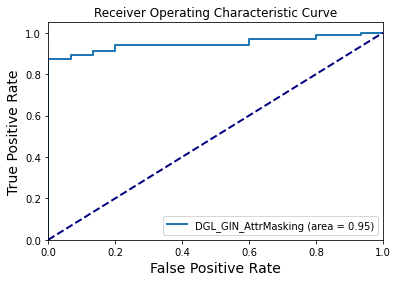

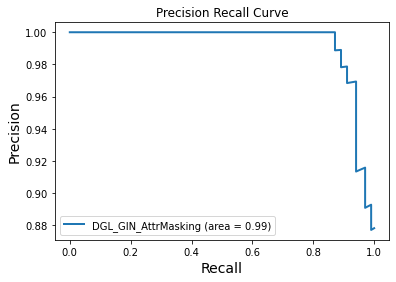

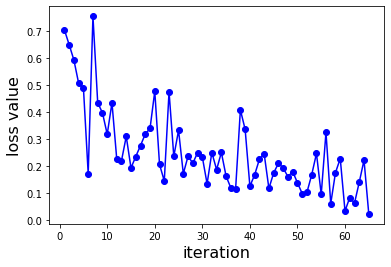

In [36]:
config = utils.generate_config(drug_encoding = drug_encoding, 
                               train_epoch = 5, 
                               LR = 0.001, 
                               batch_size = 32,
                               mpnn_hidden_size = 200,
                               mpnn_depth = 5)
model = CompoundPred.model_initialize(**config)
model.train(train, val, test)
model.save_model('./tutorial_model')

## Leaderboard 

Every dataset in TDC is a benchmark, and we provide training, validation, and test sets for it, together with data splits and performance evaluation metrics. To participate in the leaderboard for a specific benchmark, follow these steps:

- Use the TDC benchmark data loader to retrieve the benchmark.

- Use training and/or validation set to train your model.

- Use the TDC model evaluator to calculate the performance of your model on the test set.

- Submit the test set performance to a TDC leaderboard.


## ADMET leaderboard

ADMET is a cornerstone of small molecule drug discovery, defining drug efficacy and toxicity profile. An ML model that could accurately predict all ADMET properties using structural information of compounds would be greatly valuable.
We formulate the ADMET Benchmark Group using 22 ADMET datasets in TDC. 


In [ ]:
from tdc.benchmark_group import admet_group

# get the benchmark group class
group = admet_group(path = 'data/')

# get specific benchmark in the benchmark group
benchmark = group.get('Caco2_Wang')

# get data splits
predictions = {}
name = benchmark['name']
train_val, test = benchmark['train_val'], benchmark['test']

## --- train your model --- ##

# get model prediction on test set
predictions[name] = y_pred

# call TDC evaluator
group.evaluate(predictions)
# {'caco2_wang': {'mae': 0.234}}

<div>
<img src="leaderboard.png" width="500" align="left"/>
</div>

We have four leaderboards! Checkout https://tdcommons.ai/benchmark/overview/!

More tutorials are available at https://github.com/mims-harvard/TDC/tree/main/tutorials